In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
expected_return = np.matrix([[0.064], [0.037], [0.085]])
cov_matrix = np.matrix([[0.007870, 0.003085, 0.000989],
                       [0.003085, 0.003696, 0.000129],
                       [0.000989, 0.000129, 0.009587]])
# mu is the target return
mu = 0.08
# capital is the total budget
capital = 10

In [3]:
def calc_portfolio(mu, expected_return, cov_matrix, capital):

    # calculate asset allocation
    ones = np.matrix([[1] for item in expected_return])
    x1 = expected_return.T * cov_matrix.I * ones
    x2 = expected_return.T * cov_matrix.I * expected_return
    x3 = ones.T * cov_matrix.I * ones
    lambda1 = (x3 * mu - x1) / (x2 * x3 - np.square(x1))
    lambda2 = (x2 - x1 * mu) / (x2 * x3 - np.square(x1))
    weights = cov_matrix.I * (lambda1[0, 0] * expected_return + lambda2[0, 0] * ones)

    # add results to dictionary object
    portfolio_details = {}
    portfolio_details['mu'] = mu
    w = []

    # capture all weights and investment amounts
    for i, val in enumerate(weights):
        w.append(round(val[0, 0] * capital, 2))

    # calculate portfolio variance and standard deviation
    portfolio_details['tot_var'] = (weights.T * cov_matrix * weights)[0, 0]
    portfolio_details['std_dev'] = np.sqrt(portfolio_details['tot_var'])

    return w[0],w[1],w[2], np.sqrt(portfolio_details['tot_var'])

In [4]:
target = []
w1 = []
w2 = []
w3 = []
std = []
for mu in np.arange(0.04,0.0701,0.0002):
    target.append(mu)
    a,b,c,sig = calc_portfolio(mu, expected_return, cov_matrix, capital)
    w1.append(a)
    w2.append(b)
    w3.append(c)
    std.append(sig)


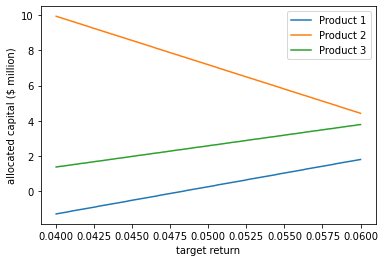

In [5]:
plt.plot(target[0:101], w1[0:101], label = "Product 1")
plt.plot(target[0:101], w2[0:101], label = "Product 2")
plt.plot(target[0:101], w3[0:101], label = "Product 3")
plt.xlabel('target return')
plt.ylabel('allocated capital ($ million)')
plt.legend()
plt.show()

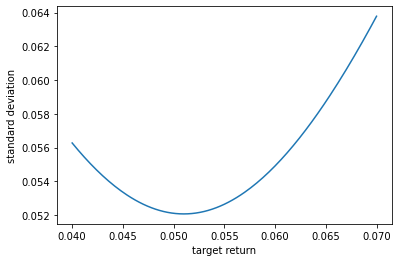

In [6]:
plt.plot(target, std)
plt.xlabel('target return')
plt.ylabel('standard deviation')
plt.show()